# Data Importing and Pre-processing

### Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used

In [2]:
# Import dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


e_df = pd.read_csv('online_shoppers_intention.csv')
e_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [3]:
# Describe the dataset
print(f"Dataset Dimensions: {e_df.shape}")
print(f"\nData Types:\n{e_df.dtypes}")
print(f"\nDataset Information:\n{e_df.info()}")
print(f"\nDataset Summary:\n{e_df.describe()}")

Dataset Dimensions: (12330, 18)

Data Types:
Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-

### Clean, wrangle, and handle missing data

In [4]:
# Check for missing values
print(f"Missing Values:\n{e_df.isnull().sum()}")

# --------Handle Missing Values--------

# Fill numeric columns with the median
e_df['BounceRates'].fillna(e_df['BounceRates'].median())
e_df['ExitRates'].fillna(e_df['ExitRates'].median())

# Replace page duration columns with 0
e_df['Administrative_Duration'].fillna(0)
e_df['Informational_Duration'].fillna(0)
e_df['ProductRelated_Duration'].fillna(0)

# Fill categorical values with mode 
e_df['Month'].fillna(e_df['Month'].mode()[0])
e_df['VisitorType'].fillna(e_df['VisitorType'].mode()[0])

# Drop any remaining rows that have missing values 
e_df.dropna(inplace=True)



print("Number of rows after dropping missing values:", len(e_df))

Missing Values:
Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64
Number of rows after dropping missing values: 11948


### Transform data appropriately using techniques such as aggregation, normalization, and feature construction

In [5]:
# Normalize numerical features to ensure consistent scales
scaler = MinMaxScaler()
e_df[['BounceRates', 'ExitRates', 'ProductRelated_Duration']] = scaler.fit_transform(
    e_df[['BounceRates', 'ExitRates', 'ProductRelated_Duration']]
)

# Aggregate the average product-related duration by Region and reset the index
region_product_duration = e_df.groupby('Region')['ProductRelated_Duration'].mean().reset_index()
region_product_duration.rename(columns={'ProductRelated_Duration': 'Avg_Product_Duration'}, inplace=True)

# Drop any duplicate 'Avg_Product_Duration' columns
if 'Avg_Product_Duration' in e_df.columns:
    e_df = e_df.drop(columns=['Avg_Product_Duration'])

# Now merge with the main dataframe
e_df = e_df.merge(region_product_duration, on='Region', how='left')

# Feature Construction: Create a "Total Duration" feature for overall session length
e_df['TotalDuration'] = e_df['Administrative_Duration'] + e_df['Informational_Duration'] + e_df['ProductRelated_Duration']

### Reduce redundant data and perform need based discretization

In [6]:
# Drop redundant columns
e_df.drop(columns=['Administrative_Duration', 'Informational_Duration'], inplace=True)

# Discretize 'TotalDuration' into categories
e_df['DurationCategory'] = pd.cut(e_df['TotalDuration'], bins=3, labels=["Low", "Medium", "High"])

# Final review of the cleaned and preprocessed data
print(f"\nFinal DataFrame Summary:\n{e_df.info()}")
print(f"\nSample Data:\n{e_df.head()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11948 entries, 0 to 11947
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           11948 non-null  int64   
 1   Informational            11948 non-null  float64 
 2   ProductRelated           11948 non-null  int64   
 3   ProductRelated_Duration  11948 non-null  float64 
 4   BounceRates              11948 non-null  float64 
 5   ExitRates                11948 non-null  float64 
 6   PageValues               11948 non-null  float64 
 7   SpecialDay               11948 non-null  float64 
 8   Month                    11948 non-null  object  
 9   OperatingSystems         11948 non-null  float64 
 10  Browser                  11948 non-null  int64   
 11  Region                   11948 non-null  int64   
 12  TrafficType              11948 non-null  int64   
 13  VisitorType              11948 non-null  object  
 14  Weeken

# Data Analysis and Visualization

### Identify categorical, ordinal, and numerical variables within the data

<p><strong>CATEGORICAL VARIABLES:</strong>
Administrative, Informational, ProductRelated, Month, Weekend, Revenue,
DurationCategory, Operating Systems, Browser,Region, TrafficType, VisitorType, Weekendd, Revenue, and DurationCategory

From the categorical variables stated above, the following are ORDINAL VARIABLES: 

<strong>NUMERICAL VARIABLES:</strong>
ProductRelated_Duration, BounceRates, ExitRates, PageValues, 
SpecialDay, Avg_Product_Duration, and TotalDuration</p>

### Provide measures of centrality and distribution with visualizations

In [6]:
numerical_variables = ['ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 
'SpecialDay', 'Avg_Product_Duration', 'TotalDuration']
# Filter numerical 
numerical_df = e_df[ numerical_variables]

In [7]:
# Descriptive Statistics for Numerical Variables
numerical_df.describe()

,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Avg_Product_Duration,TotalDuration
count,12330.000000,12330.000000,12330.000000,12195.000000,12330.000000,12330.000000,12330.000000
mean,0.018676,0.110957,0.215364,5.911196,0.061427,0.018676,115.309684
std,0.029913,0.242442,0.242983,18.632116,0.198917,0.001178,250.824728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.016182,0.000000
25%,0.002878,0.000000,0.071429,0.000000,0.000000,0.017859,0.005438
50%,0.009362,0.015562,0.125782,0.000000,0.000000,0.018577,18.578519
75%,0.022887,0.084063,0.250000,0.000000,0.000000,0.019947,120.977855
max,1.000000,1.000000,1.000000,361.763742,1.000000,0.019947,5949.125000


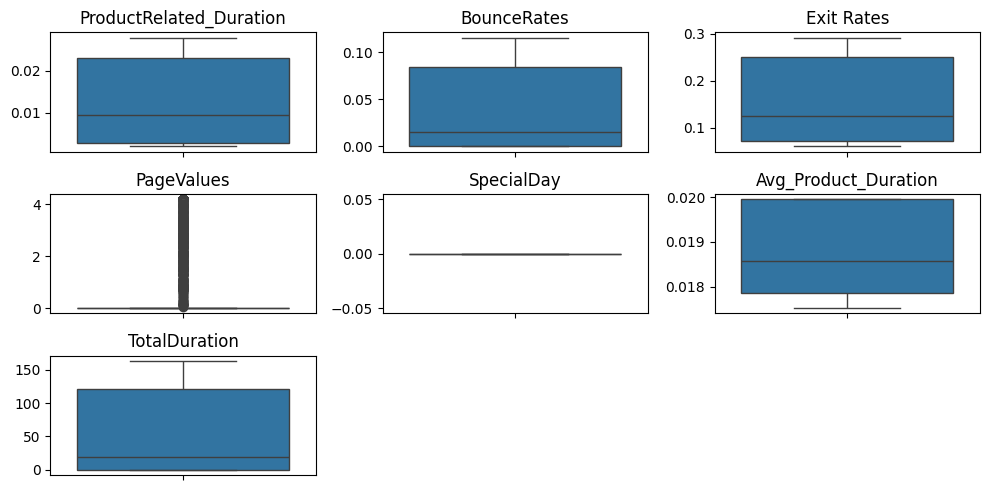

In [8]:
# Create subplots
# Axes 2*3 matrix axes
# Winsorize 10% from both the lower and upper tails
# numerical_df = winsorize(numerical_df, limits=[0.1, 0.1])
# Winsorize 10% from both the lower and upper tails
def winsorize_dataframe(df, limits=(0.2, 0.2)):
    """Winsorizes all numeric columns in the dataframe."""
    df_winsorized = df.copy()
    for col in df_winsorized.select_dtypes(include='number'):
        df_winsorized[col] = winsorize(df_winsorized[col], limits=limits)
    return df_winsorized

numerical_df = winsorize_dataframe(numerical_df)

fig, axes = plt.subplots(3, 3, figsize=(10, 5))

# Boxplot for ProductRelated_Duration
sns.boxplot(y=numerical_df['ProductRelated_Duration'], ax=axes[0,0])
axes[0,0].set_title('ProductRelated_Duration')

# Boxplot for BounceRates
sns.boxplot(y=numerical_df['BounceRates'],  ax=axes[0,1])
axes[0,1].set_title('BounceRates')

# Boxplot for ExitRates
sns.boxplot(y=numerical_df['ExitRates'], ax=axes[0,2] )
axes[0,2].set_title('Exit Rates')

# Boxplot for PageValues
sns.boxplot(y=numerical_df['PageValues'], ax=axes[1,0])
axes[1,0].set_title('PageValues')

# Boxplot for SpecialDay
sns.boxplot(y=numerical_df['SpecialDay'],  ax=axes[1,1])
axes[1,1].set_title('SpecialDay')

# Boxplot for Avg_Product_Duration
sns.boxplot(y=numerical_df['Avg_Product_Duration'], ax=axes[1,2] )
axes[1,2].set_title('Avg_Product_Duration')

# Boxplot for Total_Duration
sns.boxplot(y=numerical_df['TotalDuration'], ax=axes[2,0] )
axes[2,0].set_title('TotalDuration')

axes[2,1].set_visible(False)
axes[2,2].set_visible(False)

# Removes y-labels from all plots
for row in axes:
    for element in row:
        element.set_ylabel("")
        
plt.tight_layout()
plt.show()

# SPECIAL DAY STILL CONTAINS NAN

### Diagnose for correlations between variables and determine independent and dependent variables

<p>Based on the correlation matrix show above. The only two variables that are strongly correlated are: BounceRates and ExitRates, with a positive correlation coeeficient of .91. The remaining numerical variables have weak correlation ranging from .01 to .4.</p> 

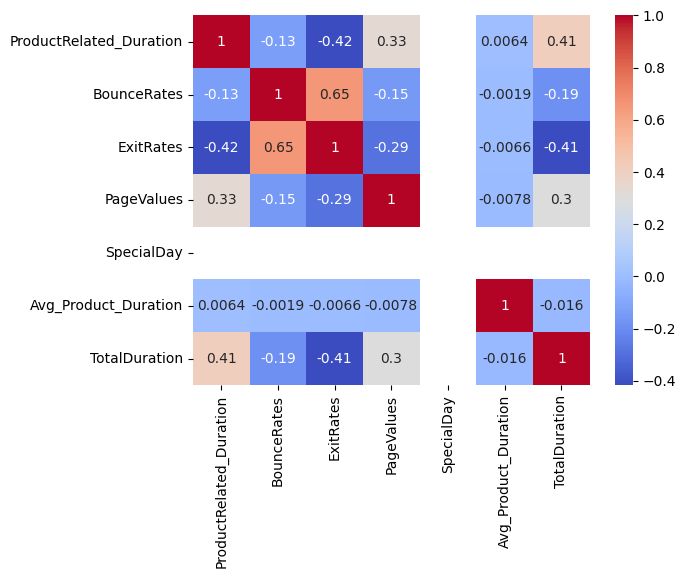

In [9]:
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Variance Inflation Factor (VIF)

In [10]:
import warnings
warnings.filterwarnings("ignore")

# Calculate IVF values
vif_df = pd.DataFrame()
vif_df["feature"] = numerical_df.columns

# calculating VIF for each feature -- COPIED FROM INTERNET
vif_df["VIF"] = [variance_inflation_factor(numerical_df.values, i)
                        for i in range(len(numerical_df.columns))]

print(vif_df) #WE NEED TO TRANSFORM EXIT RATES AND AVERAGE PRODUCT DURATION --> 
# We need to get them below 10 ---> 

# Can we remove either Avg_Product_Duration or Exit Rates?

                   feature        VIF
0  ProductRelated_Duration   3.640705
1              BounceRates   3.147915
2                ExitRates   9.406155
3               PageValues   1.524625
4               SpecialDay        NaN
5     Avg_Product_Duration  10.905300
6            TotalDuration   2.284988


##### This implies that ExitRates and Avg_Product_Duration are likely to be correlated, representing multicollinearity concerns.

#### Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

## Visitor Type Bar Chart

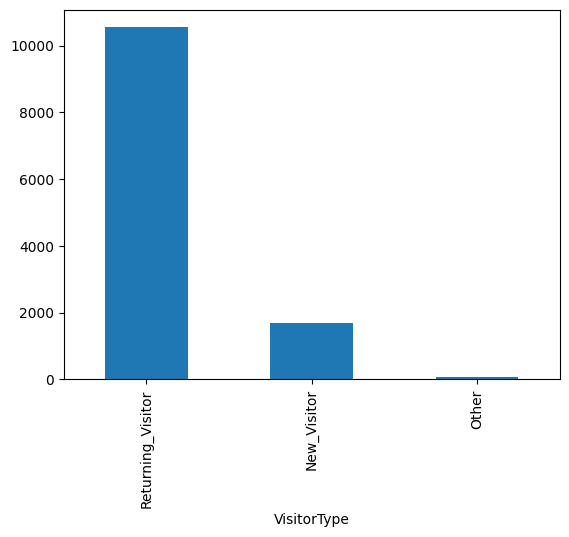

In [11]:
e_df['VisitorType'].value_counts().plot(kind='bar')
plt.show()

## Clustered Bar Plot

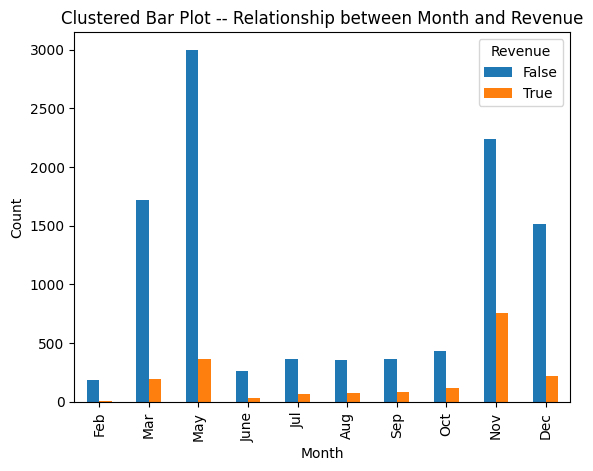

In [12]:
# Create a dictionary to map month acronyms to their numerical values
# To sort by month
month_order = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 
               'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Group by the 'Month' and Sub-group by Revenue
grouped = e_df.groupby(['Month'])['Revenue'].value_counts().unstack()
grouped_df = grouped.reset_index() # Converts result to DF

# Add a new column with the numerical month values
grouped_df['month_num'] = grouped_df['Month'].map(month_order)

# Sort the DataFrame by the numerical month column
grouped_df.sort_values('month_num', inplace=True)

# Drop the temporary numerical month column
grouped_df.drop('month_num', axis=1, inplace=True)

grouped_df.plot(x='Month', kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Clustered Bar Plot -- Relationship between Month and Revenue')
plt.show()

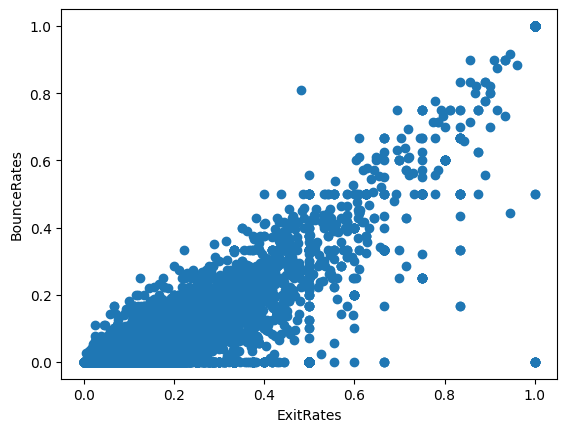

In [21]:
# Scatterplot between ExitRates and Bounces
plt.scatter(e_df['ExitRates'], e_df['BounceRates'])
plt.xlabel('ExitRates')
plt.ylabel('BounceRates')
plt.show()

Response Variables are <strong>BounceRates, ExitRates and Page Values</strong>